<a href="https://colab.research.google.com/github/HuyKhoi-code/intro-to-semantic-segment/blob/main/U_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khoivohuy","key":"02df61ffe25a9966bf3dcafeb89f10a6"}'}

In [2]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 65 Nov  8 07:15 kaggle.json


In [3]:
# dowload dataset from kaggle
!kaggle datasets download -d xiaose/cityscapes

100% 7.91G/7.92G [02:01<00:00, 32.9MB/s]
100% 7.92G/7.92G [02:01<00:00, 69.8MB/s]


In [4]:
!unzip cityscapes.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_instanceTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_labelTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_072295_gtFine_polygons.json  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_color.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_instanceTrainIds.png  
  inflating: Cityspaces/gtFine/val/frankfurt/frankfurt_000001_073088_gtFine_labelIds.png  
  inflating: City

In [2]:
import tensorflow as tf
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2

In [3]:
# get the label data
label_path = glob.glob('/content/Cityspaces/gtFine/train/aachen/aachen_000'+'*'+'_000019_gtFine_labelIds.png')
label_path.sort()
print (label_path)

['/content/Cityspaces/gtFine/train/aachen/aachen_000000_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000001_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000002_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000003_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000004_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000005_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000006_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000007_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000008_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000009_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000010_000019_gtFine_labelIds.png', '/content/Cityspaces/gtFine/train/aachen/aachen_000011_000019_gtFine_labelI

In [4]:
# original img data
img_path = glob.glob('/content/Cityspaces/images/train/aachen/aachen_000'+'*'+'_000019_leftImg8bit.png')
img_path.sort()
print (img_path)

['/content/Cityspaces/images/train/aachen/aachen_000000_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000001_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000002_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000003_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000004_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000005_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000006_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000007_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000008_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000009_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000010_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aachen/aachen_000011_000019_leftImg8bit.png', '/content/Cityspaces/images/train/aache

In [6]:
label_path = np.array(label_path)
img_path = np.array (img_path)
label = label_path[4]
seg = cv2.imread (label)
seg = cv2.resize (seg,(224,224))
mi, ma = np.min(seg), np.max(seg)
n_classes = ma - mi + 1
print("minimum seg = {}, maximum seg = {}, Total number of segmentation classes = {}".format(mi,ma, n_classes))

img = img_path[4]
img = cv2.imread(img)
img = cv2.resize(img, (224,224))

minimum seg = 1, maximum seg = 33, Total number of segmentation classes = 33


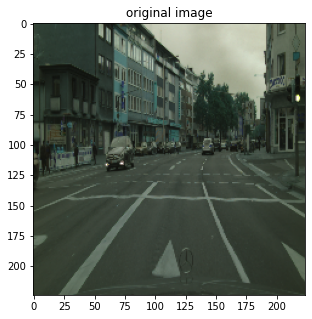

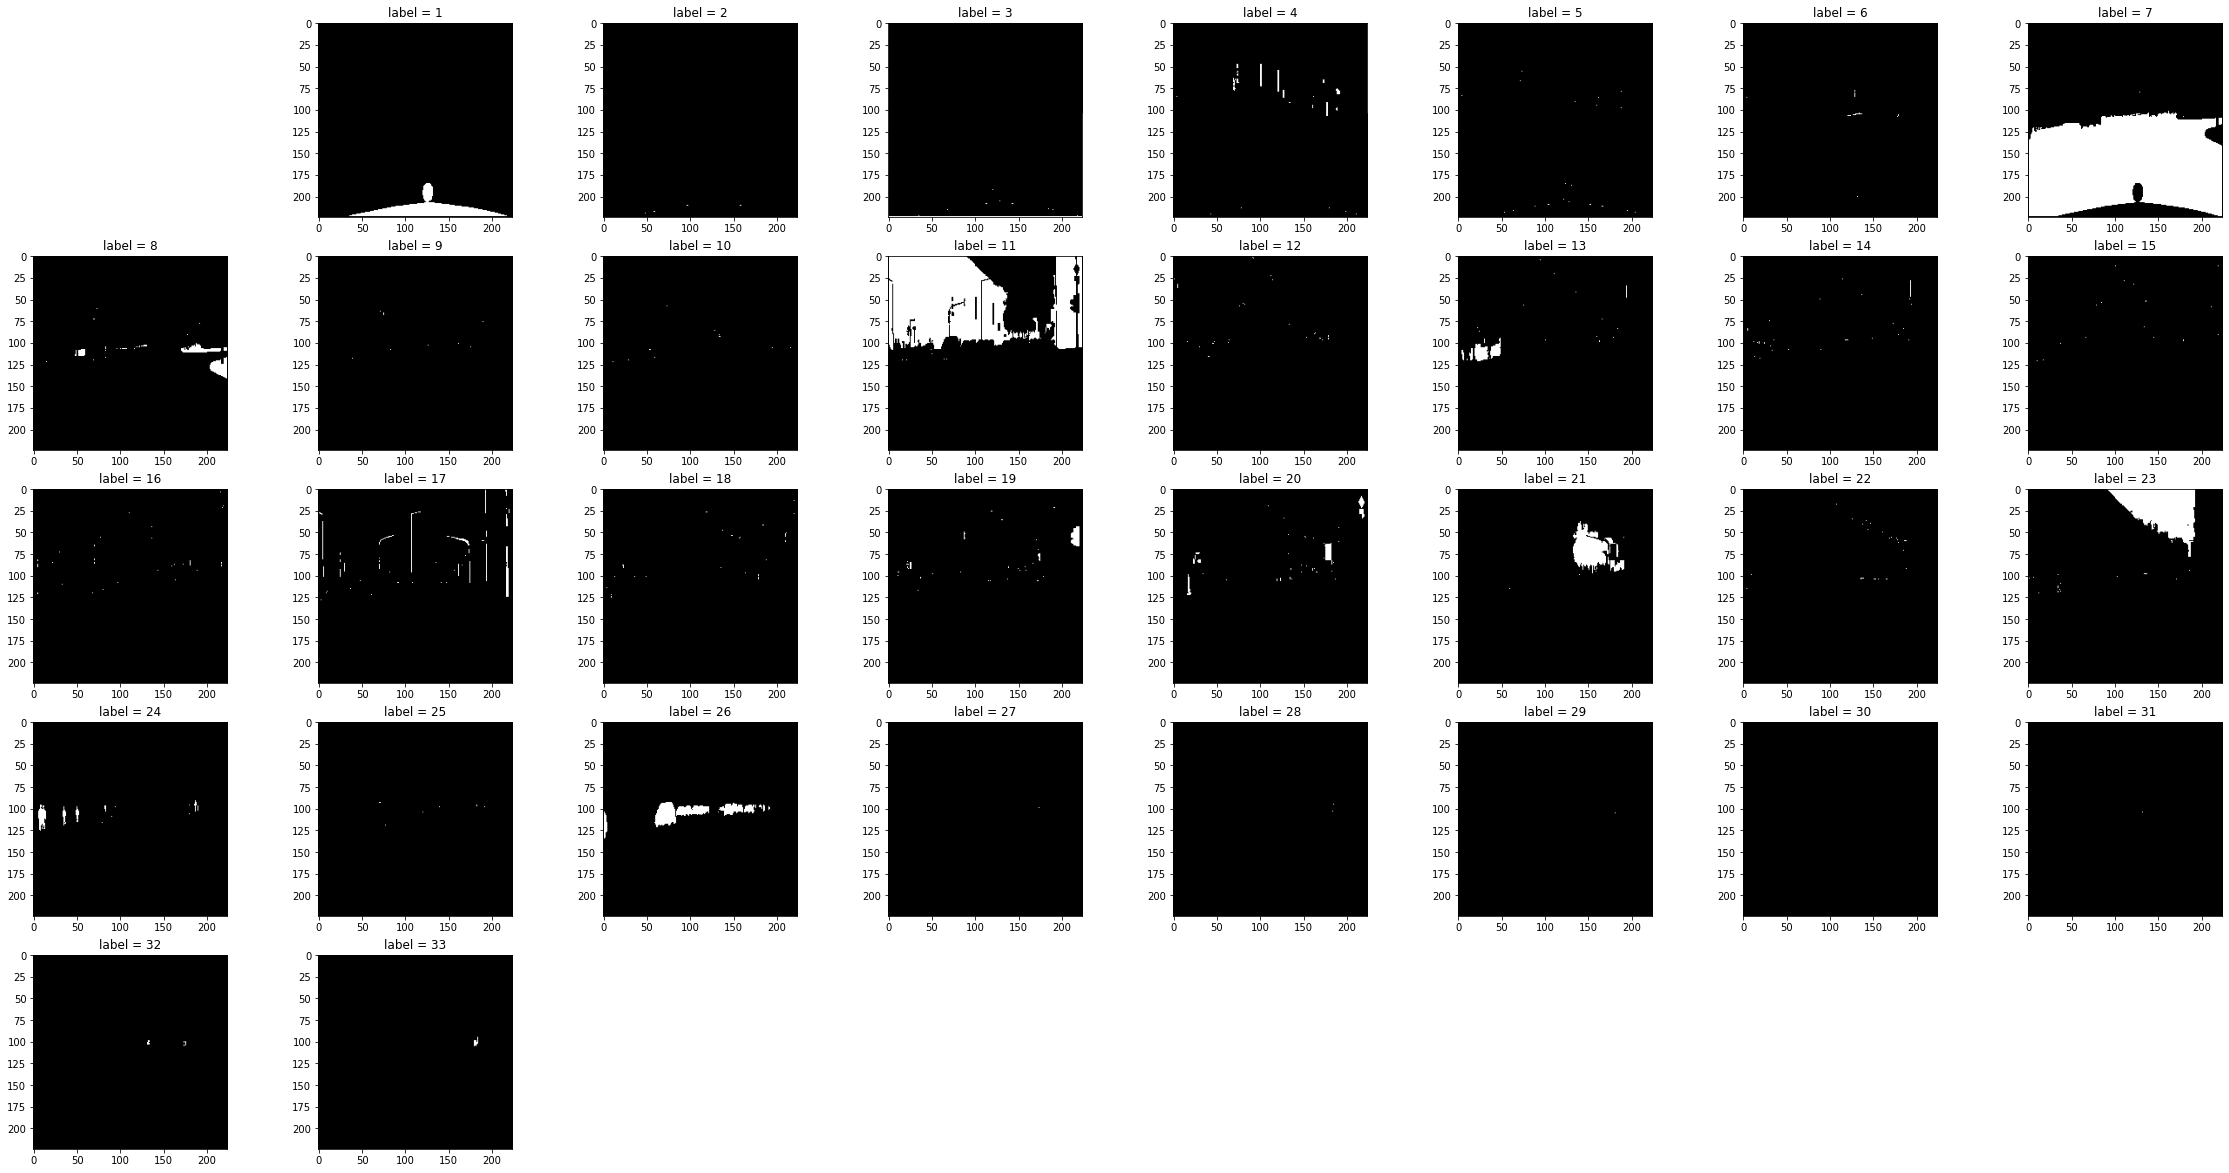

In [7]:
# review img and all the labels of the dataset
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.set_title("original image")
plt.show()

fig = plt.figure(figsize=(40,25))
for k in range(mi,ma+1):
    ax = fig.add_subplot(6, n_classes/4, k+1)
    ax.imshow((seg == k)*1.0)
    ax.set_title("label = {}".format(k))


plt.show()

In [9]:
input_height , input_width = 224, 224
output_height , output_width = 224, 224

def getImageArr( path , width , height ):
        img = cv2.imread(path)
        img = np.float32(cv2.resize(img, ( width , height ))) / 255
        return img

def getSegmentationArr( path , nClasses ,  width , height  ):

    seg_labels = np.zeros((  height , width  , nClasses ))
    img = cv2.imread(path)
    img = cv2.resize(img, ( width , height ))
    img = img[:, : , 0]

    for c in range(nClasses):
        seg_labels[: , : , c ] = (img == c ).astype(int)
    return seg_labels

X = []
Y = []
for im , seg in zip (img_path, label_path) :
    X.append( getImageArr (im , input_width , input_height )  )
    Y.append( getSegmentationArr (seg , n_classes , output_width , output_height )  )

X, Y = np.array(X) , np.array(Y)
print(X.shape,Y.shape)

(174, 224, 224, 3) (174, 224, 224, 33)


In [12]:
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
from keras.applications import *
from keras import optimizers

In [17]:
def Unet(input_height , input_width, n_cls):
    inputs = Input((input_height, input_width, 3))
    
    conv1 = BatchNormalization()(inputs)
    conv1 = Conv2D(32, (3, 3), padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = ELU()(conv1)
    conv1 = Conv2D(32, (3, 3), padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = ELU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ELU()(conv2)
    conv2 = Conv2D(64, (3, 3), padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = ELU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ELU()(conv3)
    conv3 = Conv2D(128, (3, 3), padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = ELU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = ELU()(conv4)
    conv4 = Conv2D(256, (3, 3), padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = ELU()(conv4)
    
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = ELU()(conv5)
    conv5 = Conv2D(512, (3, 3), padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = ELU()(conv5)

    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ELU()(conv6)
    conv6 = Conv2D(256, (3, 3), padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = ELU()(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ELU()(conv7)
    conv7 = Conv2D(128, (3, 3), padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = ELU()(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ELU()(conv8)
    conv8 = Conv2D(64, (3, 3), padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = ELU()(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ELU()(conv9)
    conv9 = Conv2D(32, (3, 3), padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = ELU()(conv9)

    conv10 = Conv2D(n_cls, (1, 1), activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    return model

In [18]:
model = Unet(input_height, input_width, n_classes)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization_19 (BatchNo (None, 224, 224, 3)  12          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 224, 224, 32) 896         batch_normalization_19[0][0]     
__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 224, 224, 32) 128         conv2d_18[0][0]                  
_______________________________________________________________________________________

In [19]:
from sklearn.utils import shuffle

train_rate = 0.8
index_train = np.random.choice(X.shape[0],int(X.shape[0]*train_rate),replace=False)
index_test  = list(set(range(X.shape[0])) - set(index_train))
                            
X, Y = shuffle(X,Y)
# split train and test data 
X_train, y_train = X[index_train],Y[index_train]
X_test, y_test = X[index_test],Y[index_test]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(139, 224, 224, 3) (139, 224, 224, 33)
(35, 224, 224, 3) (35, 224, 224, 33)


In [20]:
# use sgd for optimizing model 
sgd = optimizers.SGD(lr=1E-2, decay=5**(-4), momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# fit train data to model 
hist1 = model.fit(X_train,y_train,
                  validation_data=(X_test,y_test),
                  batch_size=16,epochs=60,verbose=2)

Epoch 1/60
9/9 - 240s - loss: 2.5242 - accuracy: 0.4383 - val_loss: 5.4292 - val_accuracy: 0.3444
Epoch 2/60
9/9 - 235s - loss: 1.4550 - accuracy: 0.6886 - val_loss: 9.3742 - val_accuracy: 0.3444
Epoch 3/60
9/9 - 237s - loss: 1.2065 - accuracy: 0.7160 - val_loss: 8.8451 - val_accuracy: 0.3444
Epoch 4/60
9/9 - 235s - loss: 1.0319 - accuracy: 0.7575 - val_loss: 8.4785 - val_accuracy: 0.3444
Epoch 5/60
9/9 - 238s - loss: 0.9322 - accuracy: 0.7823 - val_loss: 8.3917 - val_accuracy: 0.3539
Epoch 6/60
9/9 - 237s - loss: 0.8631 - accuracy: 0.7918 - val_loss: 7.1977 - val_accuracy: 0.3652
Epoch 7/60
9/9 - 235s - loss: 0.8086 - accuracy: 0.8036 - val_loss: 7.3009 - val_accuracy: 0.3599
Epoch 8/60
9/9 - 239s - loss: 0.7911 - accuracy: 0.8050 - val_loss: 7.3539 - val_accuracy: 0.3603
Epoch 9/60
9/9 - 235s - loss: 0.7537 - accuracy: 0.8114 - val_loss: 5.9977 - val_accuracy: 0.3623
Epoch 10/60
9/9 - 237s - loss: 0.7186 - accuracy: 0.8206 - val_loss: 5.9014 - val_accuracy: 0.3624
Epoch 11/60
9/9 - 2

In [21]:
model.save('/content/Unet.h5')

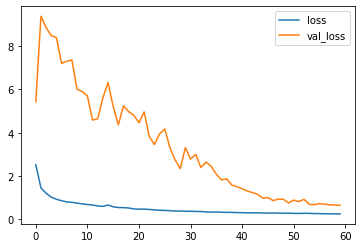

In [22]:
for key in ['loss', 'val_loss']:
    plt.plot(hist1.history[key],label=key)
plt.legend()
plt.show()

In [23]:
y_pred = model.predict(X_test)
# reshape the predict result and test 
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y_test, axis=3)
print(y_testi.shape,y_predi.shape)

(35, 224, 224) (35, 224, 224)


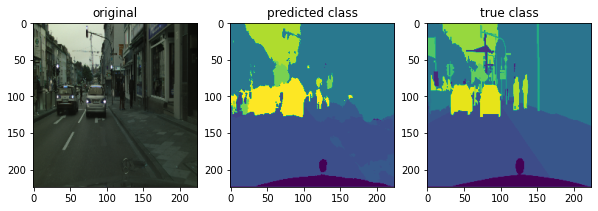

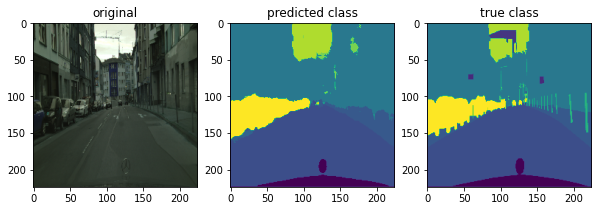

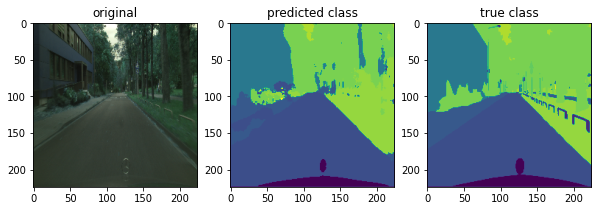

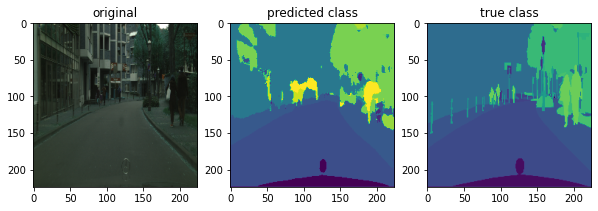

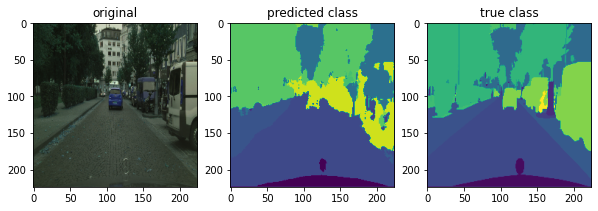

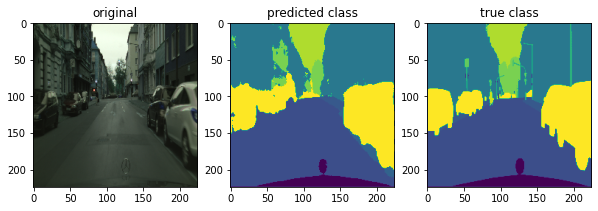

In [24]:
shape = (224,224)
n_classes= n_classes

for i in range(6):
    img_is  = X_test[i]
    seg = y_predi[i]
    true = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(seg)
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(true)
    ax.set_title("true class")
    plt.show()